In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array(
    [
        [-8.8, 2],
        [-7.8, 2], 
        [-7, 1],
        [-8.5, 1],
        [-3.7, -3],
        [-2.8, -3.5],
        [-2.4, -4], 
        [-2.4, -4.8],
        [-3.5, -4.5], 
        [-3.8, -3.8]
    ]
)

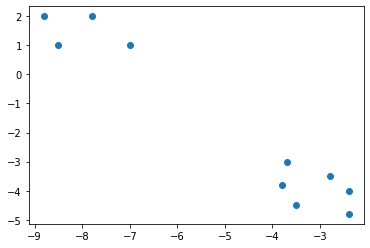

In [3]:
# visulize the data
fig = plt.scatter(X[:,0], X[:,1])

In [4]:
def dist(p1, p2):
    """
    Calculate Eclidien Distance
    """
    return np.linalg.norm(p1 - p2)

In [5]:
def kmeans(data, means):
    """
    Return the cluster according to the means;
    Update means at the same same
    """
    
    print(f"Initial means: {means}")
    print()
    n_cluster = len(means)
    clusters = [[] for i in range(n_cluster)]
    
    for point in data:
        # find the cluster this data point belongs to
        max_ind = -1
        max_val = -1
        for i in range(len(means)):
            cur_dist = dist(point, means[i])
            if cur_dist > max_val:
                max_ind = i
                max_val = cur_dist
        
        clusters[max_ind].append(point)
        
    print(f"Clusters:")
    for i in range(n_cluster):
        print(f"\t({i+1}): {clusters[i]}")
    
    print()
    # update means
    for i in range(len(means)):
        means[i] = np.mean(clusters[i], axis=0)
        
    print(f"Updated means: {means}")
        
    return clusters

In [6]:
clusters = [1]
means = [
    np.array([-3.5, 0]),
    np.array([-6.5, -3.5])
]
means_cpy = []


counter = 0
while not np.array_equal(np.sort(np.array(means).flat), np.sort(np.array(means_cpy).flat)): # iterate utill means do not update
    counter += 1
    print(f"Round: {counter}")
    
    means_cpy = means.copy()
    clusters = kmeans(X, means)
    print("-" * 110)

Round: 1
Initial means: [array([-3.5,  0. ]), array([-6.5, -3.5])]

Clusters:
	(1): [array([-8.5,  1. ]), array([-3.7, -3. ]), array([-2.4, -4. ]), array([-2.4, -4.8]), array([-3.5, -4.5]), array([-3.8, -3.8])]
	(2): [array([-8.8,  2. ]), array([-7.8,  2. ]), array([-7.,  1.]), array([-2.8, -3.5])]

Updated means: [array([-4.05      , -3.18333333]), array([-6.6  ,  0.375])]
--------------------------------------------------------------------------------------------------------------
Round: 2
Initial means: [array([-4.05      , -3.18333333]), array([-6.6  ,  0.375])]

Clusters:
	(1): [array([-8.8,  2. ]), array([-7.8,  2. ]), array([-7.,  1.]), array([-8.5,  1. ])]
	(2): [array([-3.7, -3. ]), array([-2.8, -3.5]), array([-2.4, -4. ]), array([-2.4, -4.8]), array([-3.5, -4.5]), array([-3.8, -3.8])]

Updated means: [array([-8.025,  1.5  ]), array([-3.1       , -3.93333333])]
--------------------------------------------------------------------------------------------------------------
Round: